In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
    

In [3]:

df_ask = pd.read_csv("XAGUSD_5 Mins_Ask_2023.01.01_2023.06.30.csv")
df_ask.info()
df_ask.head(), df_ask.tail()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open        35220 non-null  float64
 2   High        35220 non-null  float64
 3   Low         35220 non-null  float64
 4   Close       35220 non-null  float64
 5   Volume      35220 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


(            Time (UTC)    Open    High     Low   Close  Volume 
 0  2023.01.02 23:00:00  24.102  24.125  24.083  24.125   0.3510
 1  2023.01.02 23:05:00  24.094  24.188  24.094  24.141   1.1550
 2  2023.01.02 23:10:00  24.143  24.148  24.022  24.027   0.8820
 3  2023.01.02 23:15:00  24.026  24.028  23.986  24.028   0.8940
 4  2023.01.02 23:20:00  24.026  24.073  24.023  24.073   0.9044,
                 Time (UTC)    Open    High     Low   Close  Volume 
 35215  2023.06.30 20:35:00  22.782  22.782  22.771  22.776   1.8002
 35216  2023.06.30 20:40:00  22.775  22.781  22.775  22.776   0.7568
 35217  2023.06.30 20:45:00  22.781  22.781  22.776  22.776   0.4212
 35218  2023.06.30 20:50:00  22.776  22.797  22.774  22.786   0.6836
 35219  2023.06.30 20:55:00  22.786  22.811  22.786  22.811   0.3712)

In [4]:

df_bid = pd.read_csv("XAGUSD_5 Mins_Bid_2023.01.01_2023.06.30.csv")
df_bid.info()
df_bid.head(), df_bid.tail()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open        35220 non-null  float64
 2   High        35220 non-null  float64
 3   Low         35220 non-null  float64
 4   Close       35220 non-null  float64
 5   Volume      35220 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


(            Time (UTC)    Open    High     Low   Close  Volume 
 0  2023.01.02 23:00:00  24.036  24.059  24.017  24.059   0.3480
 1  2023.01.02 23:05:00  24.064  24.130  24.064  24.092   1.8458
 2  2023.01.02 23:10:00  24.094  24.098  23.972  23.977   0.9030
 3  2023.01.02 23:15:00  23.977  23.980  23.938  23.980   0.8940
 4  2023.01.02 23:20:00  23.978  24.024  23.976  24.023   0.8880,
                 Time (UTC)    Open    High     Low   Close  Volume 
 35215  2023.06.30 20:35:00  22.752  22.752  22.741  22.746   0.2752
 35216  2023.06.30 20:40:00  22.736  22.751  22.736  22.746   0.1410
 35217  2023.06.30 20:45:00  22.751  22.751  22.746  22.746   0.0690
 35218  2023.06.30 20:50:00  22.746  22.761  22.736  22.756   0.2160
 35219  2023.06.30 20:55:00  22.756  22.766  22.701  22.745   0.3270)

In [5]:

df = df_bid.merge(df_ask, on='Time (UTC)', how='outer')
df.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
              'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']
df.info()
df.head(), df.tail()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Local time  35220 non-null  object 
 1   Open_Bid    35220 non-null  float64
 2   High_Bid    35220 non-null  float64
 3   Low_Bid     35220 non-null  float64
 4   Close_Bid   35220 non-null  float64
 5   Volume_Bid  35220 non-null  float64
 6   Open_Ask    35220 non-null  float64
 7   High_Ask    35220 non-null  float64
 8   Low_Ask     35220 non-null  float64
 9   Close_Ask   35220 non-null  float64
 10  Volume_Ask  35220 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.0+ MB


(            Local time  Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid  \
 0  2023.01.02 23:00:00    24.036    24.059   24.017     24.059      0.3480   
 1  2023.01.02 23:05:00    24.064    24.130   24.064     24.092      1.8458   
 2  2023.01.02 23:10:00    24.094    24.098   23.972     23.977      0.9030   
 3  2023.01.02 23:15:00    23.977    23.980   23.938     23.980      0.8940   
 4  2023.01.02 23:20:00    23.978    24.024   23.976     24.023      0.8880   
 
    Open_Ask  High_Ask  Low_Ask  Close_Ask  Volume_Ask  
 0    24.102    24.125   24.083     24.125      0.3510  
 1    24.094    24.188   24.094     24.141      1.1550  
 2    24.143    24.148   24.022     24.027      0.8820  
 3    24.026    24.028   23.986     24.028      0.8940  
 4    24.026    24.073   24.023     24.073      0.9044  ,
                 Local time  Open_Bid  High_Bid  Low_Bid  Close_Bid  \
 35215  2023.06.30 20:35:00    22.752    22.752   22.741     22.746   
 35216  2023.06.30 20:40:00    22.736  

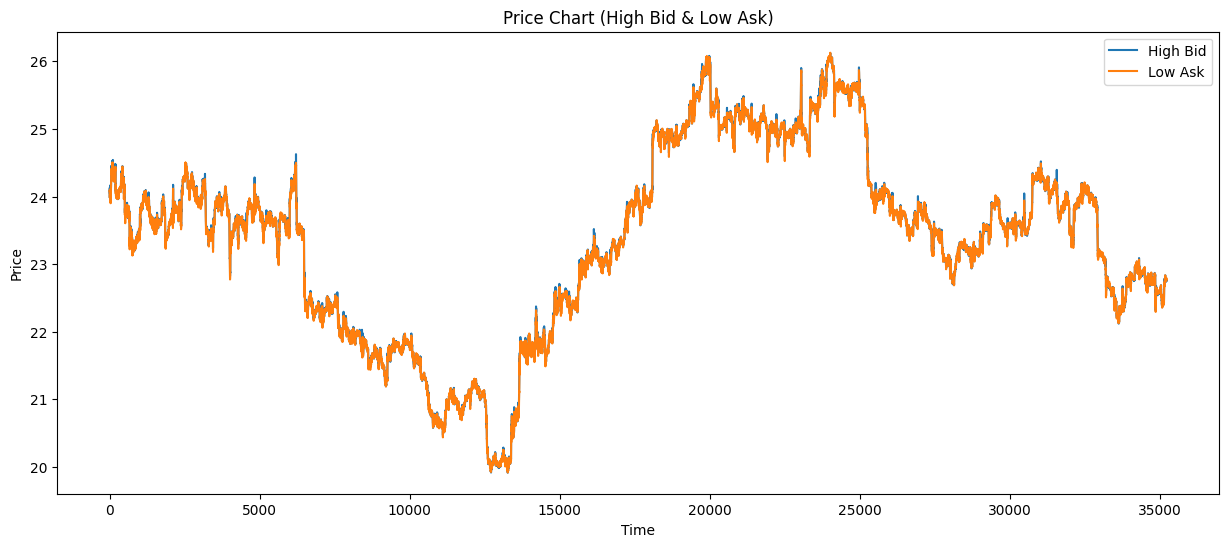

In [6]:

plt.figure(figsize=(15, 6))
plt.plot(df['High_Bid'], label='High Bid')
plt.plot(df['Low_Ask'], label='Low Ask')
plt.title("Price Chart (High Bid & Low Ask)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()
    

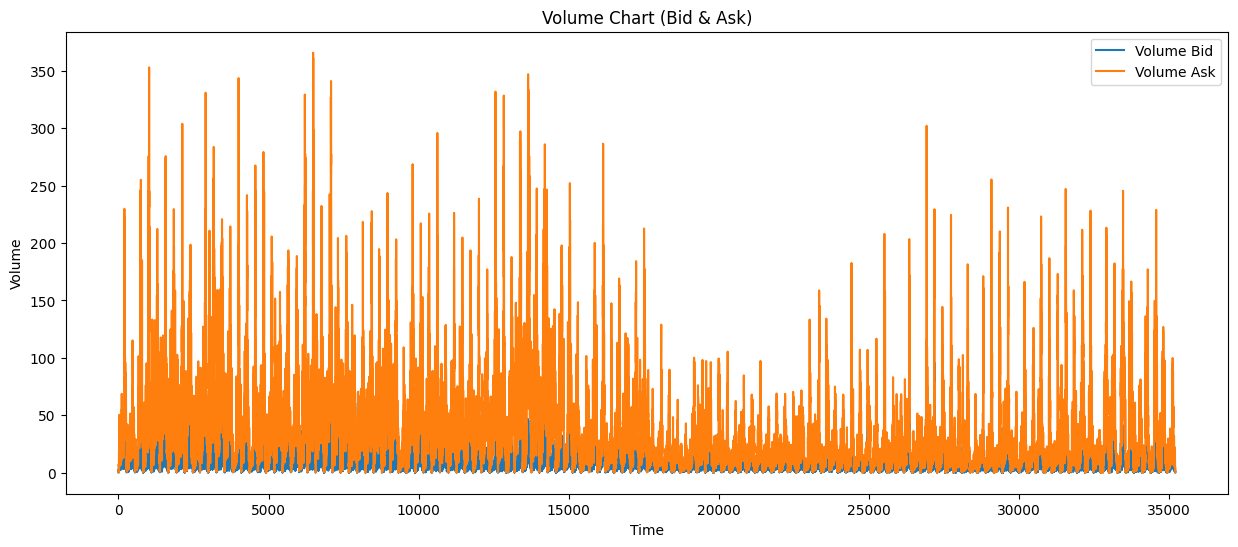

In [7]:

plt.figure(figsize=(15, 6))
plt.plot(df['Volume_Bid'], label='Volume Bid')
plt.plot(df['Volume_Ask'], label='Volume Ask')
plt.title("Volume Chart (Bid & Ask)")
plt.xlabel("Time")
plt.ylabel("Volume")
plt.legend()
plt.show()
    

In [8]:

df["High_Bid"] = (df["High_Bid"] - df["High_Bid"].min()) / (df["High_Bid"].max() - df["High_Bid"].min())
df["Low_Ask"] = (df["Low_Ask"] - df["Low_Ask"].min()) / (df["Low_Ask"].max() - df["Low_Ask"].min())
df["Volume"] = (df["Volume_Bid"] + df["Volume_Ask"]) / 2
df.head(), df.tail()
    

(            Local time  Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid  \
 0  2023.01.02 23:00:00    24.036  0.667579   24.017     24.059      0.3480   
 1  2023.01.02 23:05:00    24.064  0.679014   24.064     24.092      1.8458   
 2  2023.01.02 23:10:00    24.094  0.673861   23.972     23.977      0.9030   
 3  2023.01.02 23:15:00    23.977  0.654856   23.938     23.980      0.8940   
 4  2023.01.02 23:20:00    23.978  0.661942   23.976     24.023      0.8880   
 
    Open_Ask  High_Ask   Low_Ask  Close_Ask  Volume_Ask  Volume  
 0    24.102    24.125  0.670692     24.125      0.3510  0.3495  
 1    24.094    24.188  0.672464     24.141      1.1550  1.5004  
 2    24.143    24.148  0.660870     24.027      0.8820  0.8925  
 3    24.026    24.028  0.655072     24.028      0.8940  0.8940  
 4    24.026    24.073  0.661031     24.073      0.9044  0.8962  ,
                 Local time  Open_Bid  High_Bid  Low_Bid  Close_Bid  \
 35215  2023.06.30 20:35:00    22.752  0.457078   22.741

In [9]:

# Adjustable parameters
window_size = 50  # Number of past time steps to consider
prediction_timeframe = 1  # Number of steps ahead to predict
    

In [10]:

df["Shifted_High_Bid"] = df["High_Bid"].shift(-prediction_timeframe)
df["Shifted_Low_Ask"] = df["Low_Ask"].shift(-prediction_timeframe)
df = df.dropna()
df.head(), df.tail()
    

(            Local time  Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid  \
 0  2023.01.02 23:00:00    24.036  0.667579   24.017     24.059      0.3480   
 1  2023.01.02 23:05:00    24.064  0.679014   24.064     24.092      1.8458   
 2  2023.01.02 23:10:00    24.094  0.673861   23.972     23.977      0.9030   
 3  2023.01.02 23:15:00    23.977  0.654856   23.938     23.980      0.8940   
 4  2023.01.02 23:20:00    23.978  0.661942   23.976     24.023      0.8880   
 
    Open_Ask  High_Ask   Low_Ask  Close_Ask  Volume_Ask  Volume  \
 0    24.102    24.125  0.670692     24.125      0.3510  0.3495   
 1    24.094    24.188  0.672464     24.141      1.1550  1.5004   
 2    24.143    24.148  0.660870     24.027      0.8820  0.8925   
 3    24.026    24.028  0.655072     24.028      0.8940  0.8940   
 4    24.026    24.073  0.661031     24.073      0.9044  0.8962   
 
    Shifted_High_Bid  Shifted_Low_Ask  
 0          0.679014         0.672464  
 1          0.673861         0.660870  


In [11]:

n_small = 30000  # Limit dataset size for efficient processing
L = n_small - window_size

data = df[["Open_Bid", "High_Bid", "Low_Bid", "Close_Bid", "Volume"]].values[:n_small]

X = np.zeros((L, window_size, data.shape[1]), dtype='float32')
Y = np.zeros((L, 2), dtype='float32')

for i in range(L):
    X[i] = data[i:i+window_size]
    Y[i] = df[["Shifted_High_Bid", "Shifted_Low_Ask"]].values[i+window_size]

X.shape, Y.shape
    

((29950, 50, 5), (29950, 2))

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
    

((23960, 50, 5), (23960, 2), (5990, 50, 5), (5990, 2))

In [13]:

model = Sequential([
    LSTM(100, activation='relu', input_shape=(window_size, data.shape[1])),
    Dense(2)
])
model.summary()
    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,602 (166.41 KB)

 Trainable params: 42,602 (166.41 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:

model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    

In [ ]:

history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_split=0.1, verbose=1)
    

Epoch 1/15
674/674 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 29724508.0000 - mae: 1126.5676 - val_loss: 1598.2832 - val_mae: 26.3433
Epoch 2/15
674/674 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 1641.6451 - mae: 24.0719 - val_loss: 461.6305 - val_mae: 5.6566
Epoch 3/15
674/674 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 364.0141 - mae: 7.0796 - val_loss: 106.5322 - val_mae: 3.2988
Epoch 4/15
674/674 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 110.3354 - mae: 3.5611 - val_loss: 88.7502 - val_mae: 3.2078
Epoch 5/15
674/674 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 77.3755 - mae: 3.1066 - val_loss: 58.3778 - val_mae: 2.7195
Epoch 6/15
649/674 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 55.0707 - mae: 2.6941

In [ ]:

scores = model.evaluate(X_test, y_test, verbose=1)
scores[0], scores[1]
    

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss (Training vs Validation)")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
    

In [ ]:

predictions = model.predict(X_test[:100])

plt.figure(figsize=(15, 6))
plt.plot(predictions[:, 0], label="Predicted High_Bid", color='red')
plt.plot(y_test[:100, 0], label="Actual High_Bid", color='blue')
plt.title("Predicted vs Actual High_Bid (Normalized)")
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(predictions[:, 1], label="Predicted Low_Ask", color='red')
plt.plot(y_test[:100, 1], label="Actual Low_Ask", color='blue')
plt.title("Predicted vs Actual Low_Ask (Normalized)")
plt.legend()
plt.show()
    

In [ ]:

errors_high_bid = predictions[:, 0] - y_test[:100, 0]
errors_low_ask = predictions[:, 1] - y_test[:100, 1]

plt.figure(figsize=(15, 6))
plt.plot(errors_high_bid, label="Prediction Error (High_Bid)", color='orange')
plt.title("Prediction Error for High_Bid")
plt.xlabel("Samples")
plt.ylabel("Error")
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(errors_low_ask, label="Prediction Error (Low_Ask)", color='purple')
plt.title("Prediction Error for Low_Ask")
plt.xlabel("Samples")
plt.ylabel("Error")
plt.legend()
plt.show()
    

In [ ]:

plt.figure(figsize=(15, 6))
plt.hist(errors_high_bid, bins=30, color='orange', alpha=0.7, label="High_Bid Errors")
plt.title("Distribution of Prediction Errors (High_Bid)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.hist(errors_low_ask, bins=30, color='purple', alpha=0.7, label="Low_Ask Errors")
plt.title("Distribution of Prediction Errors (Low_Ask)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()
    

In [ ]:

plt.figure(figsize=(15, 6))
plt.scatter(y_test[:100, 0], predictions[:, 0], color='blue', alpha=0.5, label="High_Bid")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Scatter Plot of Predicted vs Actual (High_Bid)")
plt.xlabel("Actual High_Bid")
plt.ylabel("Predicted High_Bid")
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.scatter(y_test[:100, 1], predictions[:, 1], color='green', alpha=0.5, label="Low_Ask")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Scatter Plot of Predicted vs Actual (Low_Ask)")
plt.xlabel("Actual Low_Ask")
plt.ylabel("Predicted Low_Ask")
plt.legend()
plt.show()
    